<a href="https://colab.research.google.com/github/bridgetmanu/Credit-Risk-Modeling/blob/main/Credit_Risk_Analysis_%26_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business understanding

* What business objective is this model supporting (e.g., reduce default rate, increase approval rate without increasing risk)?

* What is the cost of a false positive (approving a risky customer) vs. a false negative (rejecting a good customer)?

* Are there regulatory or fairness requirements (e.g., Equal Credit Opportunity Act)?





In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
import pandas as pd # for creating, manipulating, and analyzing data
import matplotlib.pyplot as plt # for plotting charts and graphs
import numpy as np # for working with arrays
import seaborn as sns # for creating intricate plots

In [3]:
def load_data():
  data = pd.read_csv('/content/drive/My Drive/loan_data.csv')
  return data

data = load_data()
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Understanding Data

What is the target variable? (e.g., policy acceptance: 1 or 0)
- Policy acceptance: 1 or 0

What features are available, and what do they represent?
- There are 14 features in the dataset. 1 is the response variable and the other 13 are the predictors.

Are there missing values or anomalies in the data?
- There are no missing values but the data standardization and categorization needs to be done

Is the data balanced between approval/rejection or default/non-default?
- Yes, there is data imbalance between credit policies. The dataset has 7710 approved observations and 1868 rejected observations.

Are all outcomes known (i.e., is the data labeled correctly)?
- This is a labeled dataset

Are there any data leakage issues (using future data to predict the present)?
- No, the current dataset, at hand, will be splitted into 80-20 and the 20% will be used as test data




In [14]:
# number of features
no_of_features = len(data.columns)
print(f"The number of features are {no_of_features}")

# creates a list of the features in the dataset
data_columns = list(data.columns)

# get Descriptive stats
data.describe()

# get a tabular summary of the features
def get_summary(data, features):
  for feature in features:
    print(f"Summary of {feature} \n {data[feature].value_counts()}")

get_summary(data, data_columns)






The number of features are 14
Summary of credit.policy 
 credit.policy
1    7710
0    1868
Name: count, dtype: int64
Summary of purpose 
 purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64
Summary of int.rate 
 int.rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.1941      1
0.1772      1
0.1683      1
0.1778      1
0.1867      1
Name: count, Length: 249, dtype: int64
Summary of installment 
 installment
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
149.01     1
425.56     1
146.52     1
840.26     1
922.42     1
Name: count, Length: 4788, dtype: int64
Summary of log.annual.inc 
 log.annual.inc
11.002100    308
10.819778    248
10.596635    224
10.308953    224
10.714418    221
            ... 
10.578980      1
11.769983      1
10.320881      1

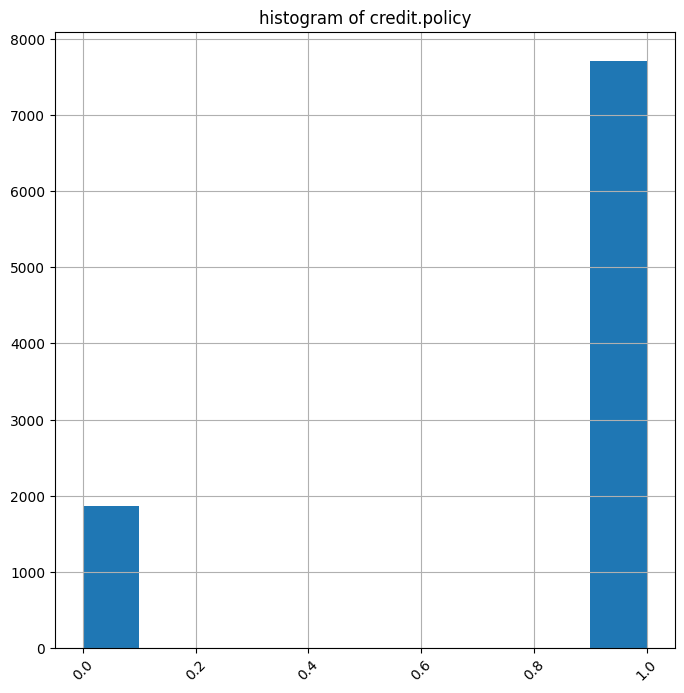

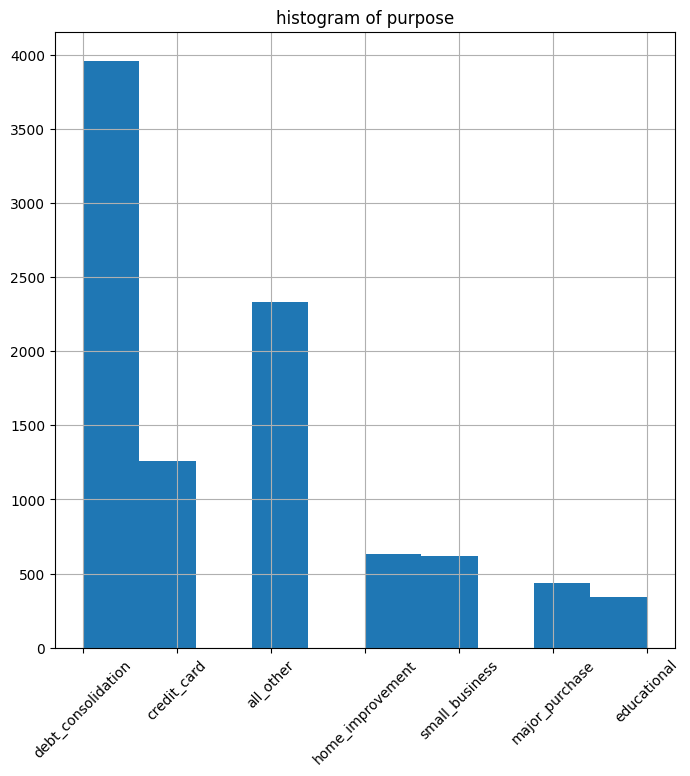

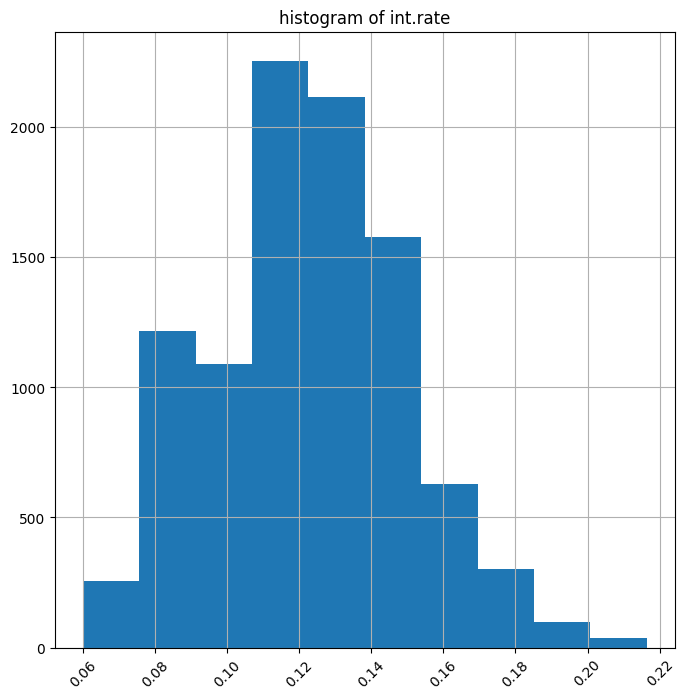

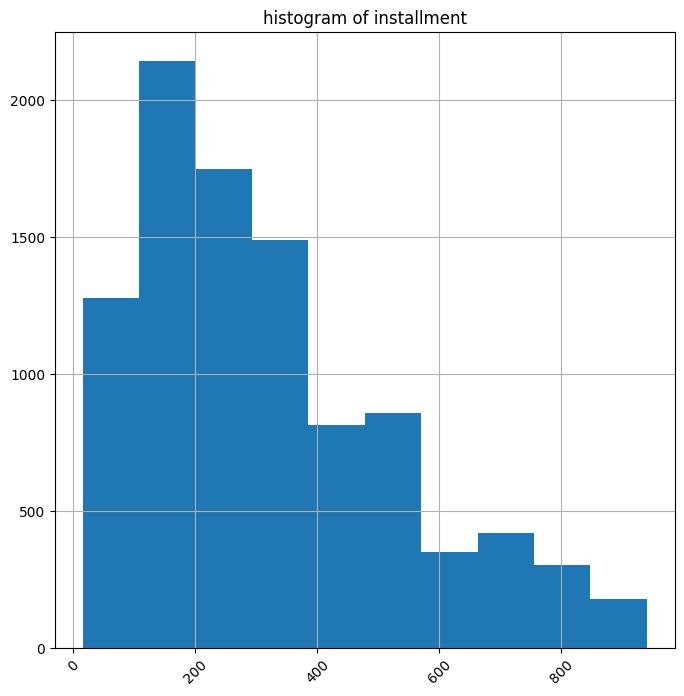

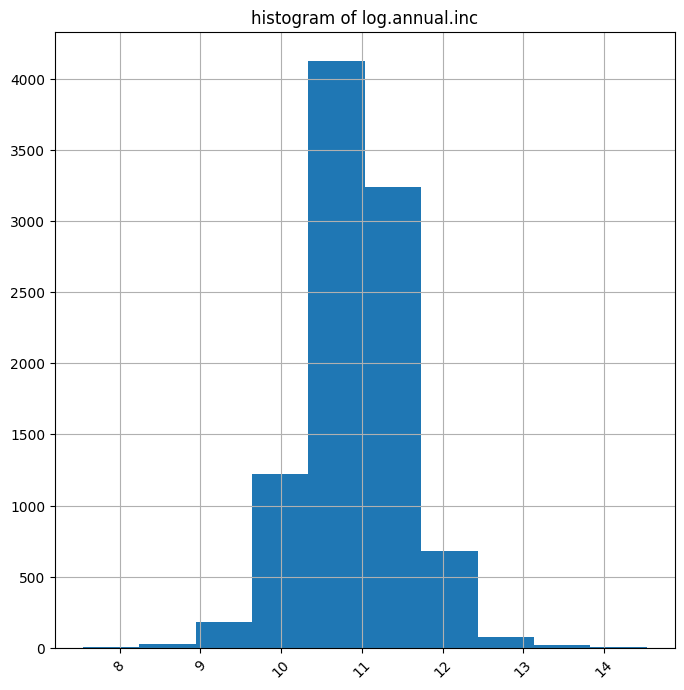

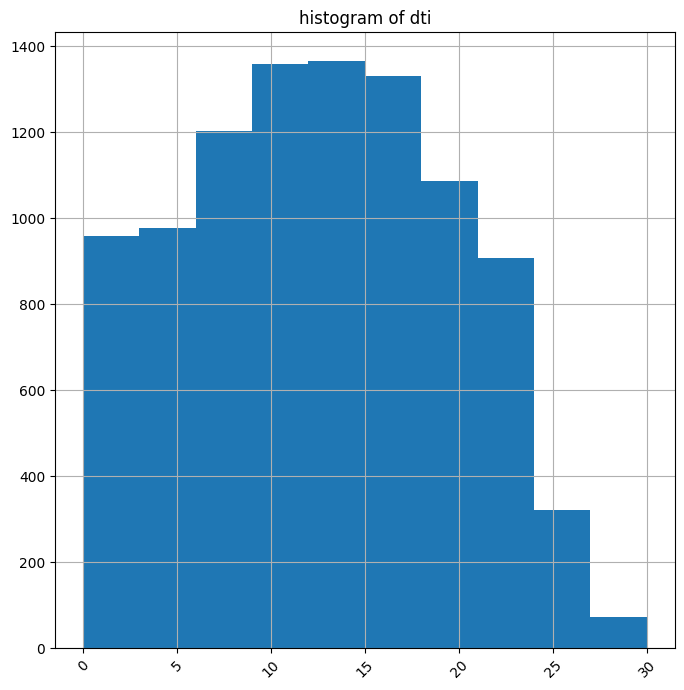

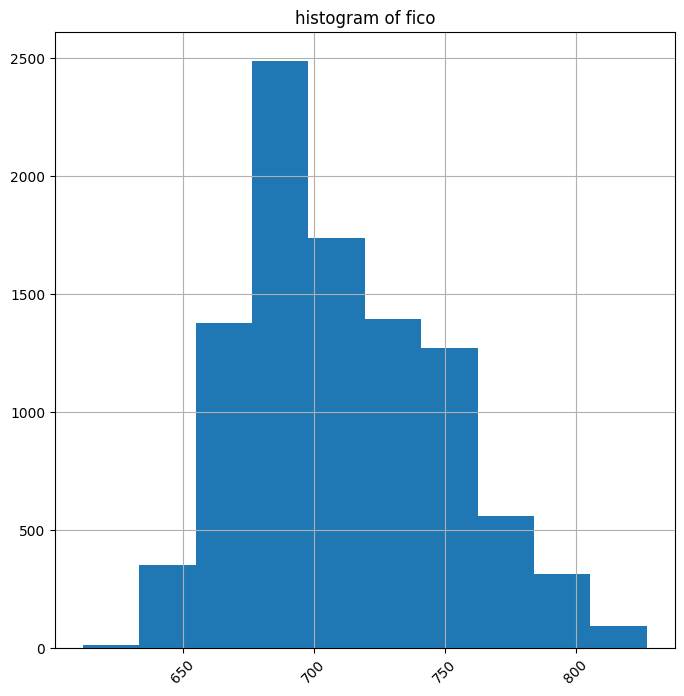

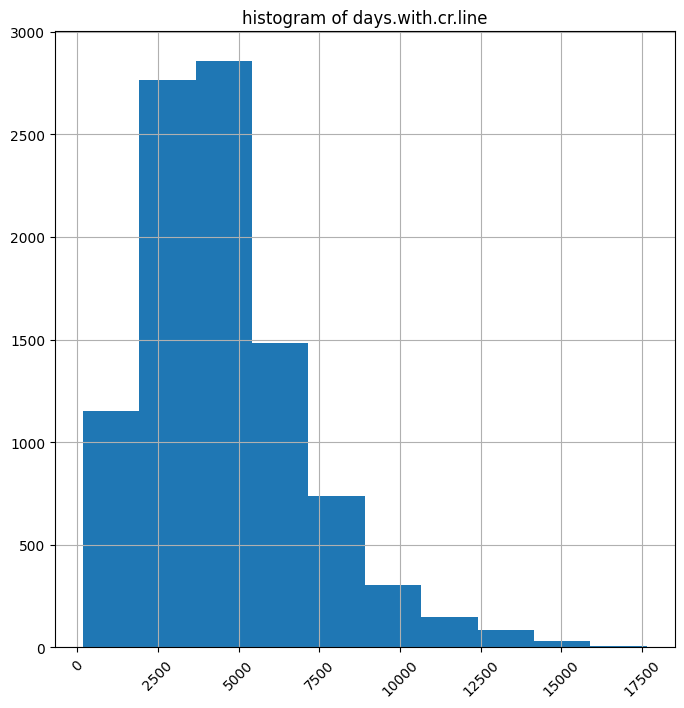

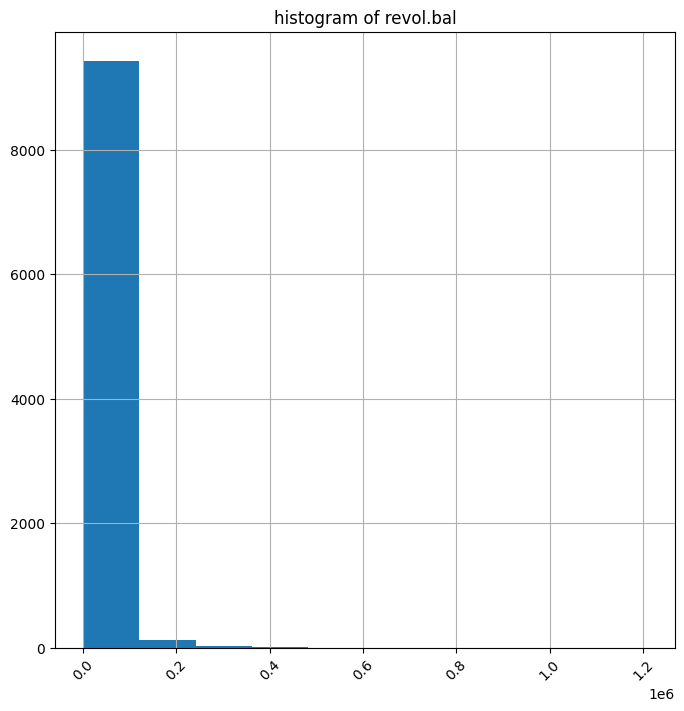

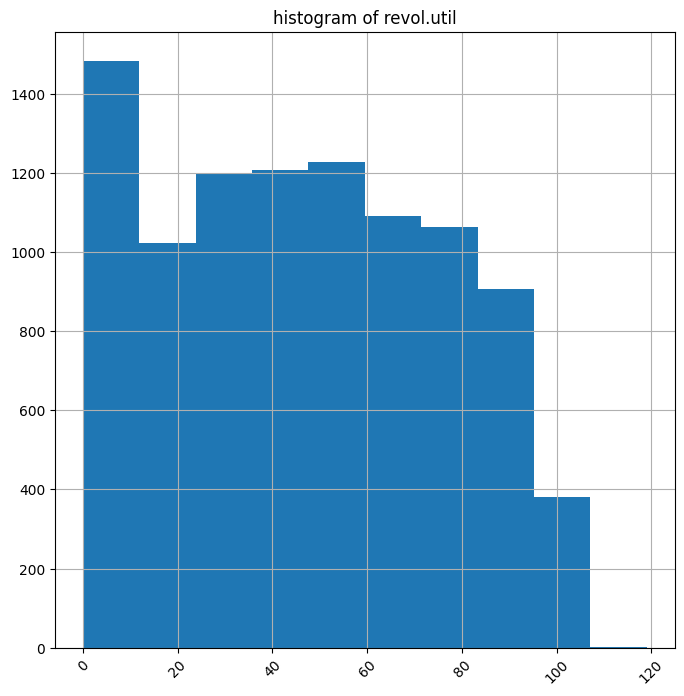

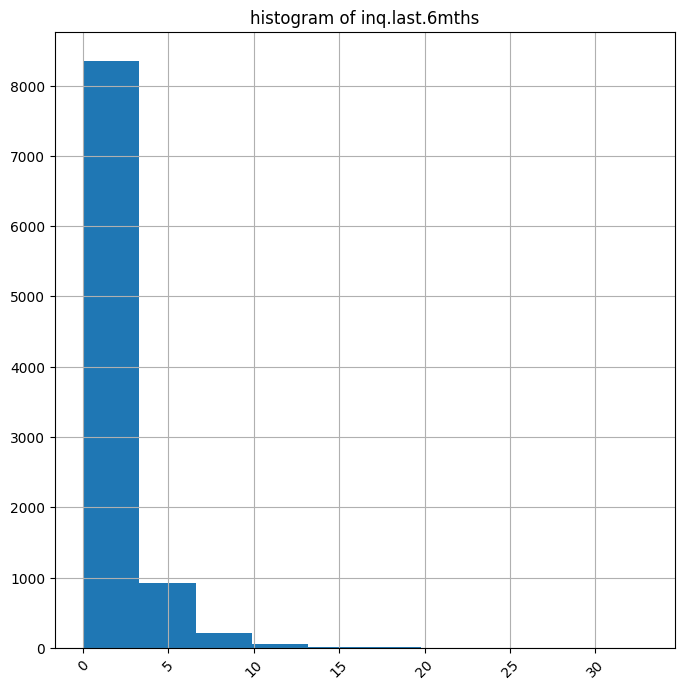

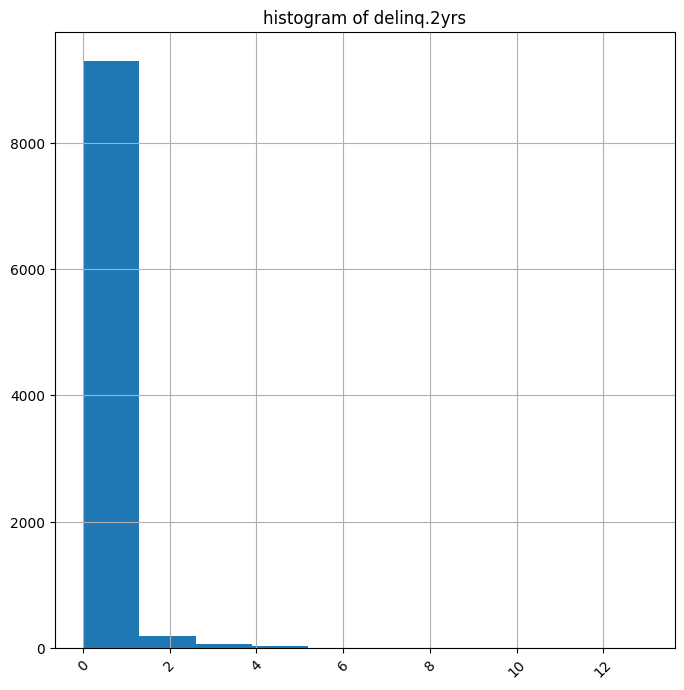

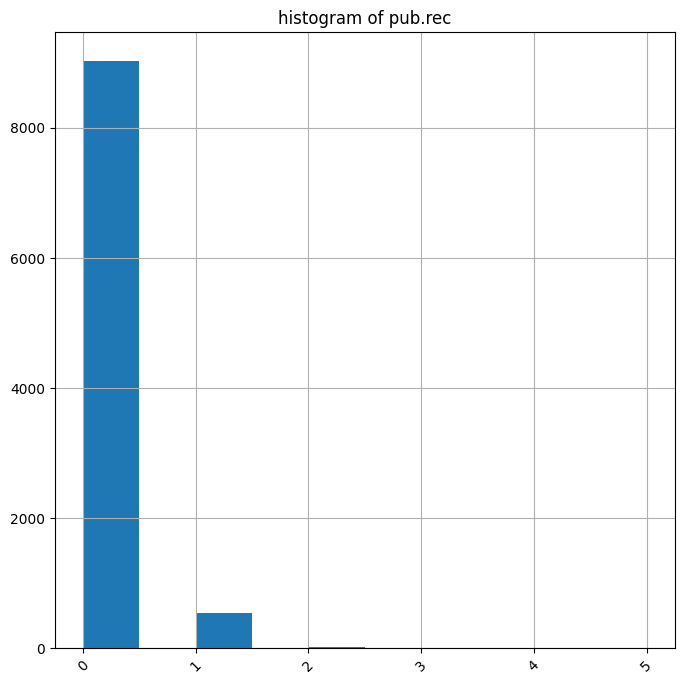

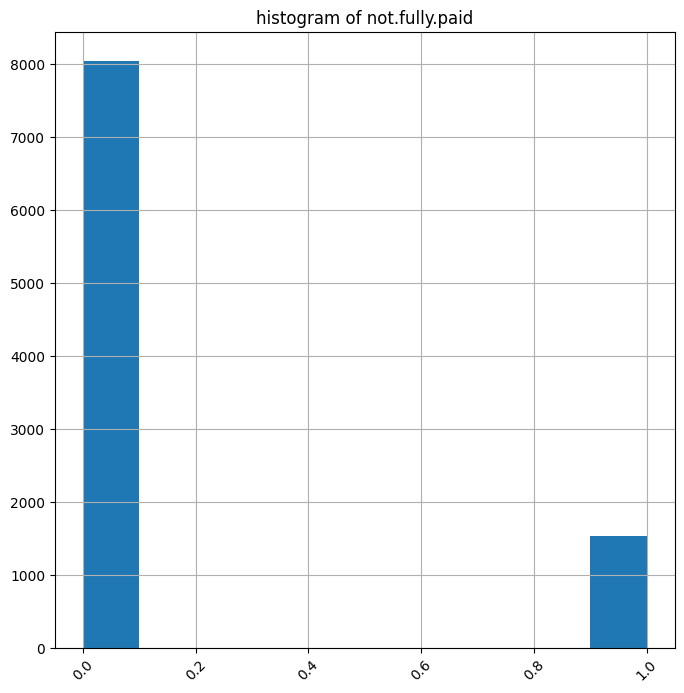

In [12]:


# a function definition to visualize distributions of the features in the data
def visualize_distribution(data, data_columns):
  for i in data_columns:
    if data[i].dtype == 'category': # creates bar graphs for categorical features
      data[i].barplot(figsize=(8,8))
      plt.xticks(rotation=45)
      plt.title(f'barplot of {i}')
      plt.show()
    else:
      data[i].hist(figsize=(8,8)) # creates histograms for all numerical features
      plt.xticks(rotation=45)
      plt.title(f'histogram of {i}')
      plt.show()

visualize_distribution(data, data_columns)



### Categorizing the Data: Bining/Bucketing

In [17]:
# FICO score

def categorize_fico(score):
  if score >= 800:
    return 'Exceptional'
  elif 740 <= score <= 799:
    return 'Very Good'
  elif 670 <= score <= 739:
    return 'Good'
  elif 580 <= score <= 669:
    return 'Fair'
  else:
    return 'Poor'



# inquiries in the last 6 months

def categorize_inq(inq):
  if inq == 0:
    return 'None'
  elif inq == 1:
    return 'Low'
  elif inq == 2:
    return 'Moderate'
  elif 3 <= inq <= 4:
    return 'High'
  elif inq >= 5:
    return 'Very High'



,count
fico.score.category,
Good,6007
Very Good,2085
Fair,1341
Exceptional,145


In [ ]:
# apply the category functions

# fico score bucketing
data['fico.score.cat'] = data['fico'].apply(categorize_fico)

# inquire bucketing
data['inq.cat'] = data['inq.last.6mths'].apply(categorize_inq)

#

## Predictors & Response variables
Credit Policy is defined as approval or denial: will be used as the response variable. The other features will be used as inputs for to train the model for prediction.


There is an data imbalance between credit policies.
The dataset consists
- 7710 observations with credit policy = 1
- 1868 observations with credit policy = 0


## Questions to guide data visualization


Which customer or application features are most predictive of credit policy acceptance or rejection?

Can we predict the probability of a customer being approved or denied credit based on their profile?

How does each feature (e.g., income, credit score, debt-to-income ratio) affect the decision made by the credit policy?


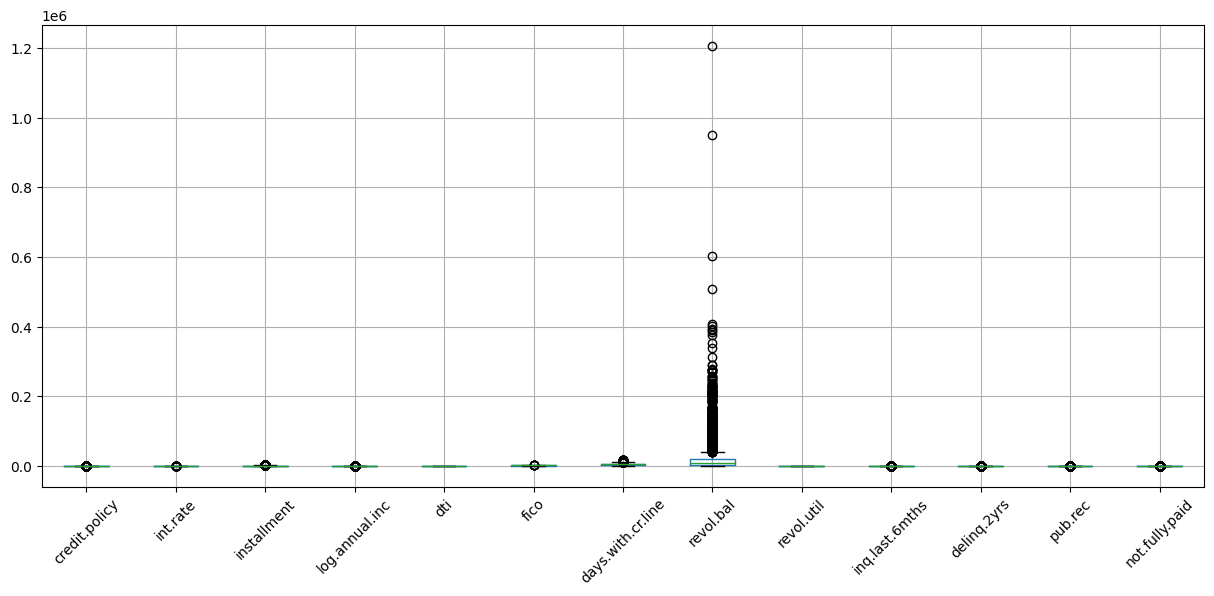

In [6]:
# Data Visualization

data.select_dtypes(include='number').boxplot(figsize=(15, 6))
plt.xticks(rotation=45)
plt.show()

### Modeling

* Models to be used are:
      **Logistic regression**
      **Gradient Boosted with SHAP**
      **SVM**

* The performance of models will be measured using **accuracy, precision, recall, F1-score, ROC-AUC**

* Class imbalance will be handled using Synthetic Minority Over-sampling Technique(SMOTE)

* I will be using SHAP for explainability of XBoost

In [7]:
# Data prep



In [8]:
# Using logistic regression



 Using SVM

In [ ]:
# check the skewness of the numerical features


columns = list(data.select_dtypes(exclude=['object']))

# contains list of features with skewness
skew_list = {}

def skew_features():
  for i in columns:
    t = data[i].skew()
    if t > 1:






### Deployment

* Who will use the model's output (e.g., loan officers, automated system)?

* Will the model be retrained periodically?

* How will you monitor model drift over time?